torch.Size([20000, 1]) tensor(0.2318) tensor(61.5335)
mean: 7.886069297790527 std: 6.94278621673584


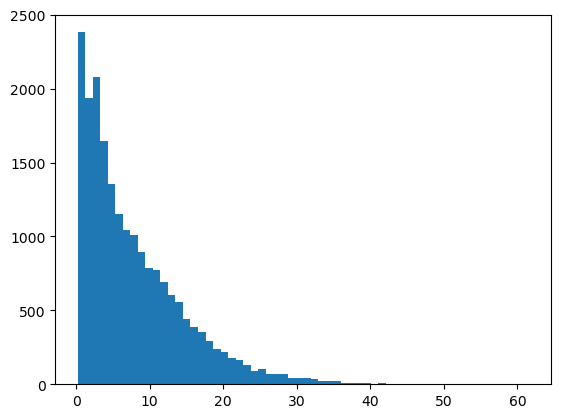

torch.Size([20000, 1]) tensor(-3.7528) tensor(6.1512)
mean: -0.2376130074262619 std: 1.401860237121582


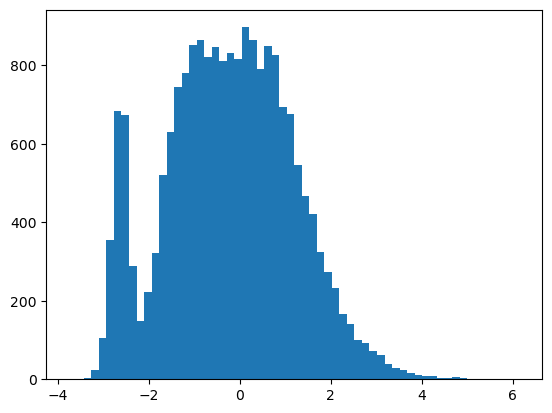

In [4]:
import torch
import matplotlib.pyplot as plt


node = torch.load("output/node.pt")[:, 0]
edge = torch.load("output/edge.pt")[:, 1]
latency = torch.load("output/ys.pt")
print(latency.shape, latency.min(), latency.max())
print("mean:", latency.mean().item(), "std:", latency.std().item())
plt.hist(latency.numpy(), bins=60)
plt.show()
smooth_latency = ((latency * 0.1).exp() - 1).log()
plt.hist(smooth_latency.numpy(), bins=60)
# plt.hist(latency.log().numpy(), bins=60)
print(smooth_latency.shape, smooth_latency.min(), smooth_latency.max())
print("mean:", smooth_latency.mean().item(), "std:", smooth_latency.std().item())
plt.show()

torch.Size([20000]) tensor(21) tensor(245)
mean: 106.67350006103516 std: 65.70252990722656


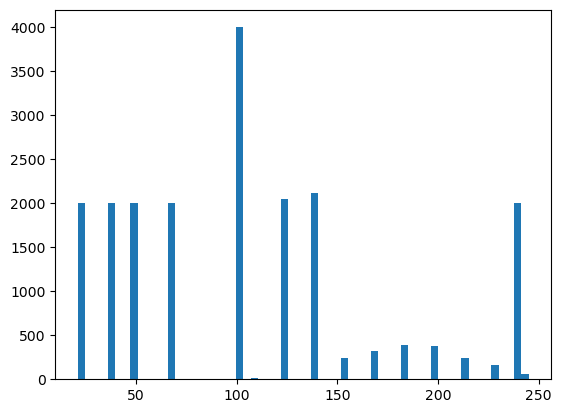

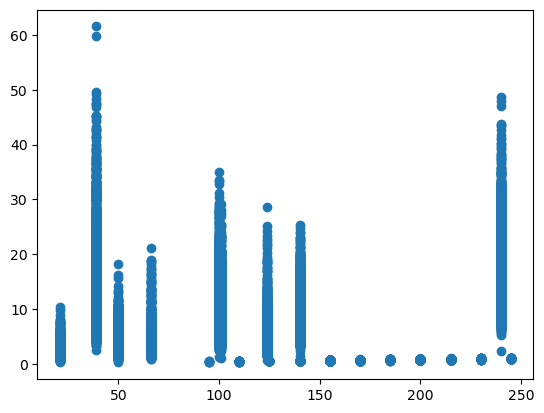

In [5]:
print(node.shape, node.min(), node.max())
print("mean:", node.float().mean().item(), "std:", node.float().std().item())

plt.hist(node.numpy(), bins=60)
plt.show()
plt.scatter(node.numpy(), latency.numpy())
plt.show()

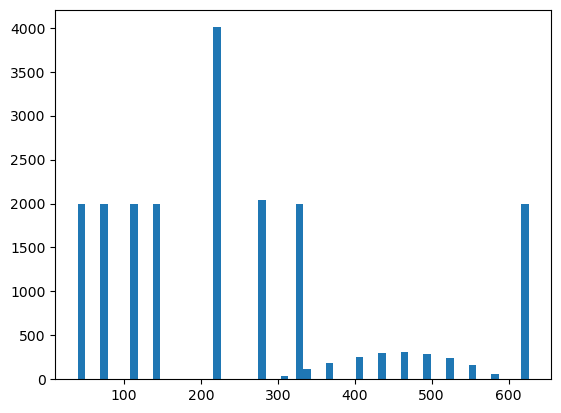

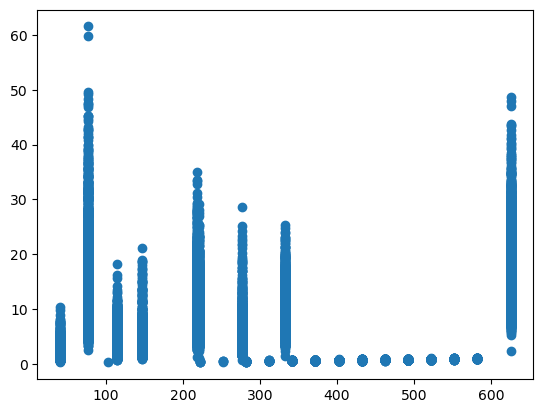

In [6]:
plt.hist(edge.numpy(), bins=60)
plt.show()

plt.scatter(edge.numpy(), latency.numpy())
plt.show()

torch.Size([20000])
torch.Size([20000]) tensor(0.0031) tensor(1.5778)
mean: 0.10412947088479996 std: 0.1277673989534378


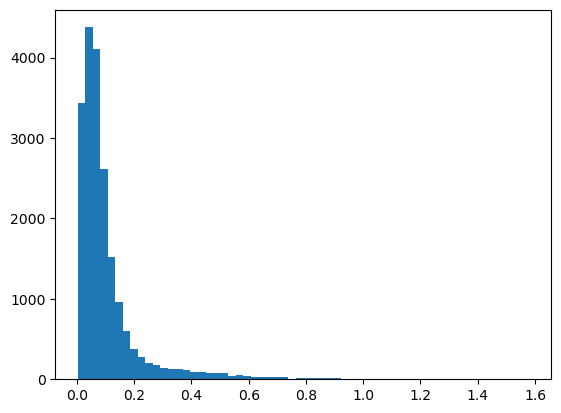

torch.Size([20000])
torch.Size([20000]) tensor(-0.1512) tensor(0.1577)
mean: -0.006669053807854652 std: 0.027019446715712547


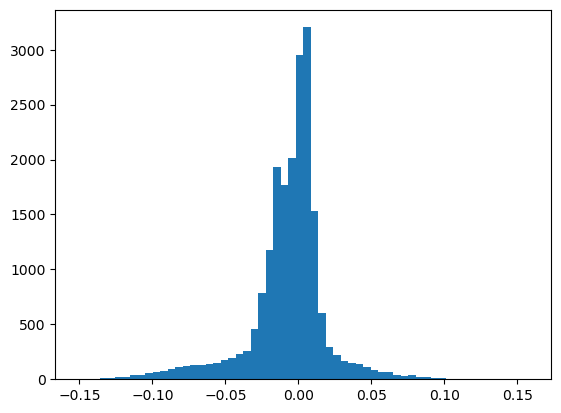

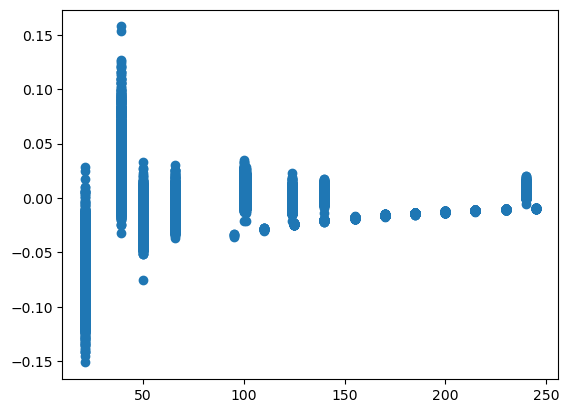

In [7]:
latency_per_token = latency.squeeze() / node.squeeze()
print(latency_per_token.shape)
print(latency_per_token.shape, latency_per_token.min(), latency_per_token.max())
print("mean:", latency_per_token.float().mean().item(), "std:", latency_per_token.float().std().item())

plt.hist(latency_per_token.numpy(), bins=60)
plt.show()


latency_per_token = ((latency * 0.1).exp() - 1).log().squeeze() / node.squeeze()
print(latency_per_token.shape)
print(latency_per_token.shape, latency_per_token.min(), latency_per_token.max())
print("mean:", latency_per_token.float().mean().item(), "std:", latency_per_token.float().std().item())
plt.hist(latency_per_token.numpy(), bins=60)
plt.show()

plt.scatter(node.squeeze(), latency_per_token.numpy())
plt.show()

In [4]:
import torch
import torch.nn.functional as F

y = torch.tensor([0.2318, 61.5335]) * 0.1
true_x = (y.exp() - 1).log()
print(true_x)
y = F.softplus(torch.tensor(-6.))
print(y)
y = torch.tensor(-4.).exp()
print(y)

tensor([-3.7529,  6.1512])
tensor(0.0025)
tensor(0.0183)


tensor(0.2325) tensor(61.5213)


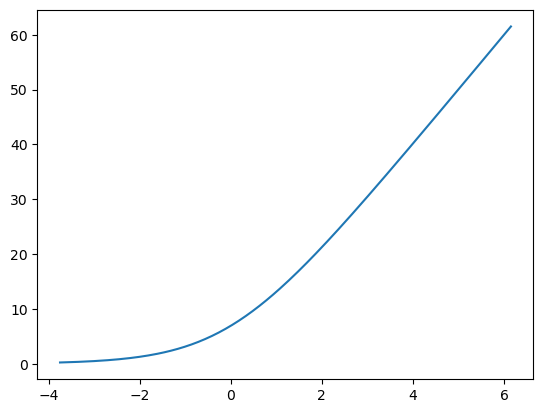

In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.linspace(-3.75, 6.15, 200)
# y = -torch.nn.functional.logsigmoid(x)
y = F.softplus(x) * 10
print(y.min(), y.max())

plt.plot(x, y)
plt.show()

In [4]:
path = "output/neuralformer_3_checkpoints/ckpt_latest.pth"

import torch

ckpt = torch.load(path, map_location="cpu")
ckpt.keys()

for name, param in ckpt["state_dict"].items():
    # print(name, param.min(), param.max(), param.mean(), param.std())
    print(name, param.mean(), param.std())

embedding.weight tensor(4.2889e-05) tensor(0.0268)
embedding.bias tensor(1.8073e-05) tensor(0.0048)
gnn_layers.0.norm.weight tensor(0.9754) tensor(0.0296)
gnn_layers.0.norm.bias tensor(-0.0004) tensor(0.0063)
gnn_layers.0.attn.qkv.weight tensor(-2.8674e-05) tensor(0.0329)
gnn_layers.0.attn.qkv.bias tensor(-0.0002) tensor(0.0205)
gnn_layers.0.attn.proj.weight tensor(-1.8888e-05) tensor(0.0226)
gnn_layers.0.attn.proj.bias tensor(-2.2393e-06) tensor(0.0042)
gnn_layers.0.attn.lin_d.weight tensor(-0.0154) tensor(0.0343)
gnn_layers.0.attn.lin_d.bias tensor(-0.0070) tensor(0.0297)
gnn_layers.0.res_scale.scale tensor(0.9919) tensor(0.0132)
gnn_layers.1.norm.weight tensor(0.9754) tensor(0.0121)
gnn_layers.1.norm.bias tensor(0.0001) tensor(0.0054)
gnn_layers.1.attn.qkv.weight tensor(9.1715e-06) tensor(0.0239)
gnn_layers.1.attn.qkv.bias tensor(0.0001) tensor(0.0089)
gnn_layers.1.attn.proj.weight tensor(4.6989e-05) tensor(0.0200)
gnn_layers.1.attn.proj.bias tensor(1.3851e-05) tensor(0.0028)
gnn_la